## Import Library

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [2]:
# show dataset
data = pd.read_csv('Bank_Customer_Churn_Dataset.csv')
data.head()

NameError: name 'pd' is not defined

In [343]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [344]:
# statistical description
data.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## Data Type

In [345]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

## Data Preprocessing

In [346]:
data.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [347]:
# Delete Unnecessary data
data.drop(['customer_id'], axis=1, inplace=True)

In [348]:
data.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

## Handle with Null or Missing data

In [349]:
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## EDA

In [406]:
data['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

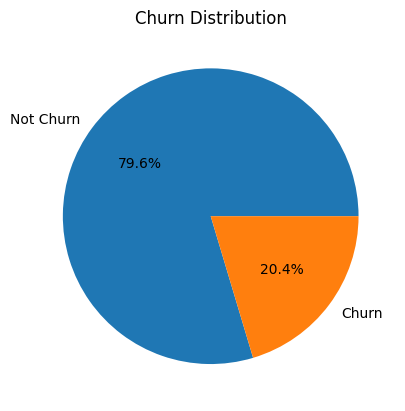

In [350]:
# show feture churn with pie chart and bar chart
# Calculate the count of churn values
churn_count = data['churn'].value_counts()

# Create a pie chart to visualize the churn feature
plt.pie(churn_count, labels=['Not Churn', 'Churn'], autopct='%1.1f%%')
plt.title('Churn Distribution')

# Show the pie chart
plt.show()

Text(0, 0.5, 'Count')

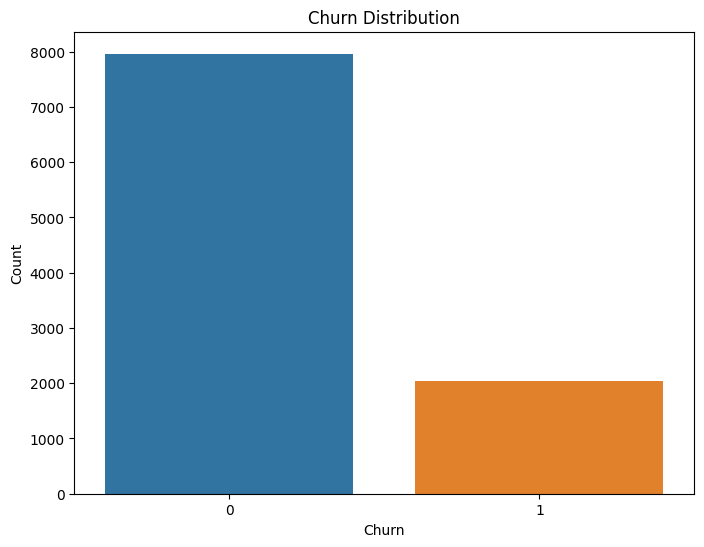

In [351]:
# Create a bar chart to visualize the churn feature
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

<Axes: xlabel='active_member', ylabel='count'>

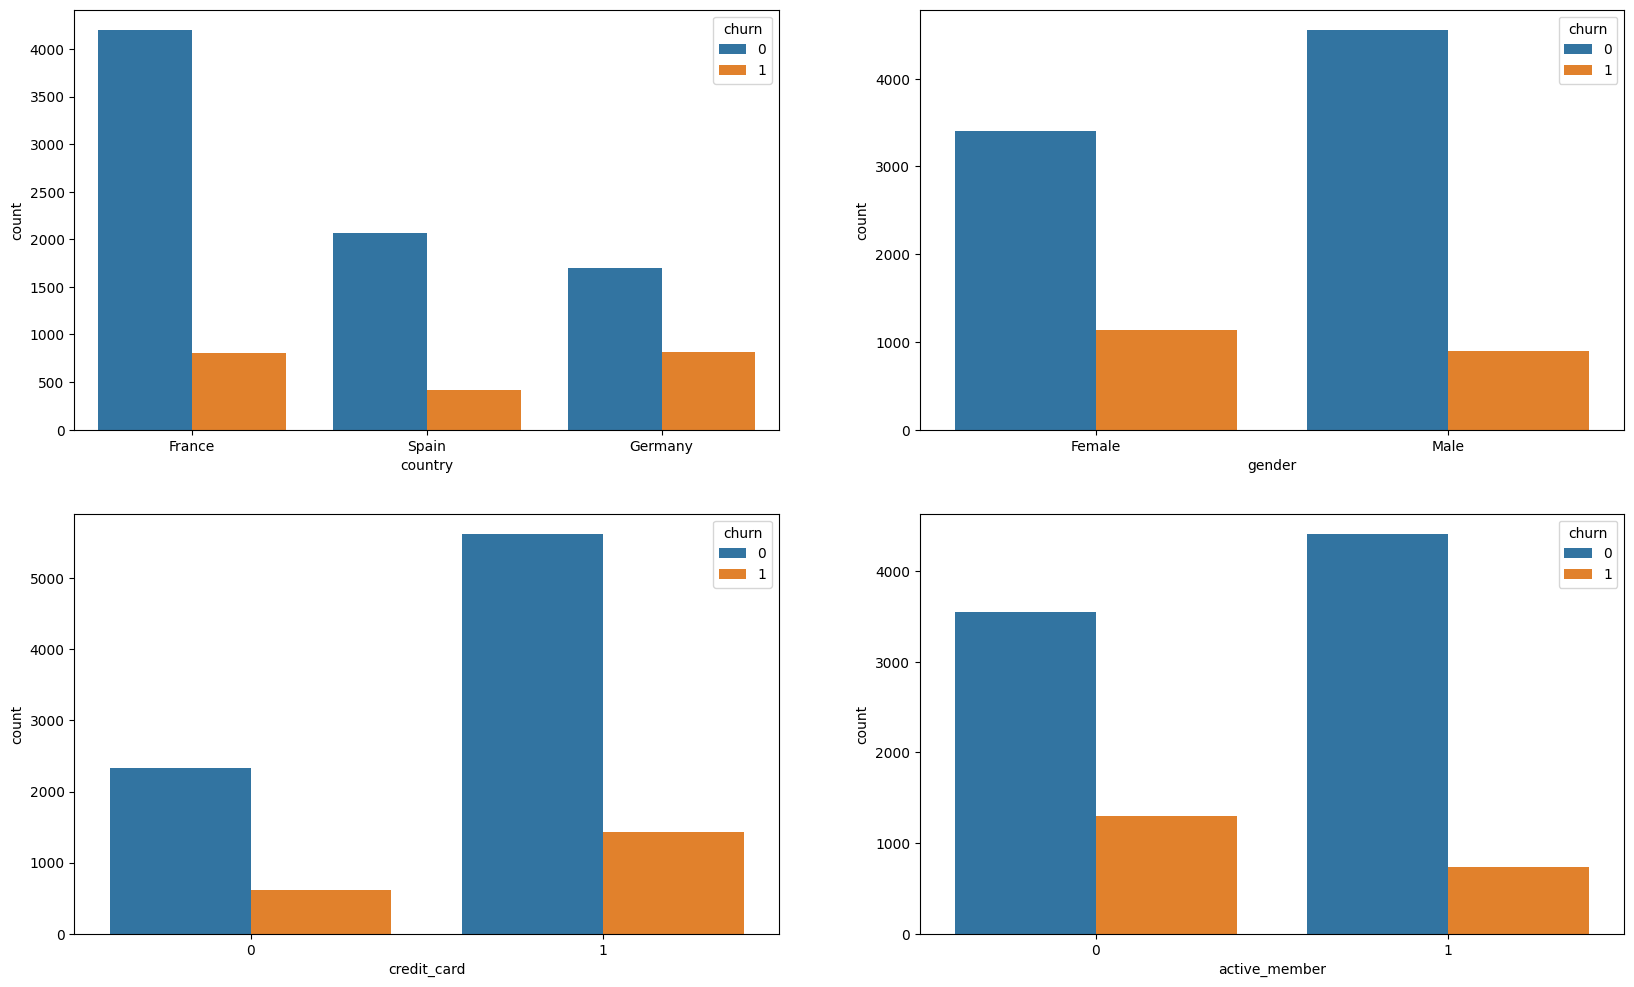

In [352]:
# bar plot country, gender, credit_card, active_member
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='country', hue='churn', data = data, ax=axarr[0][0])
sns.countplot(x='gender', hue='churn', data = data, ax=axarr[0][1])
sns.countplot(x='credit_card', hue='churn', data = data, ax=axarr[1][0])
sns.countplot(x='active_member', hue='churn', data = data, ax=axarr[1][1])

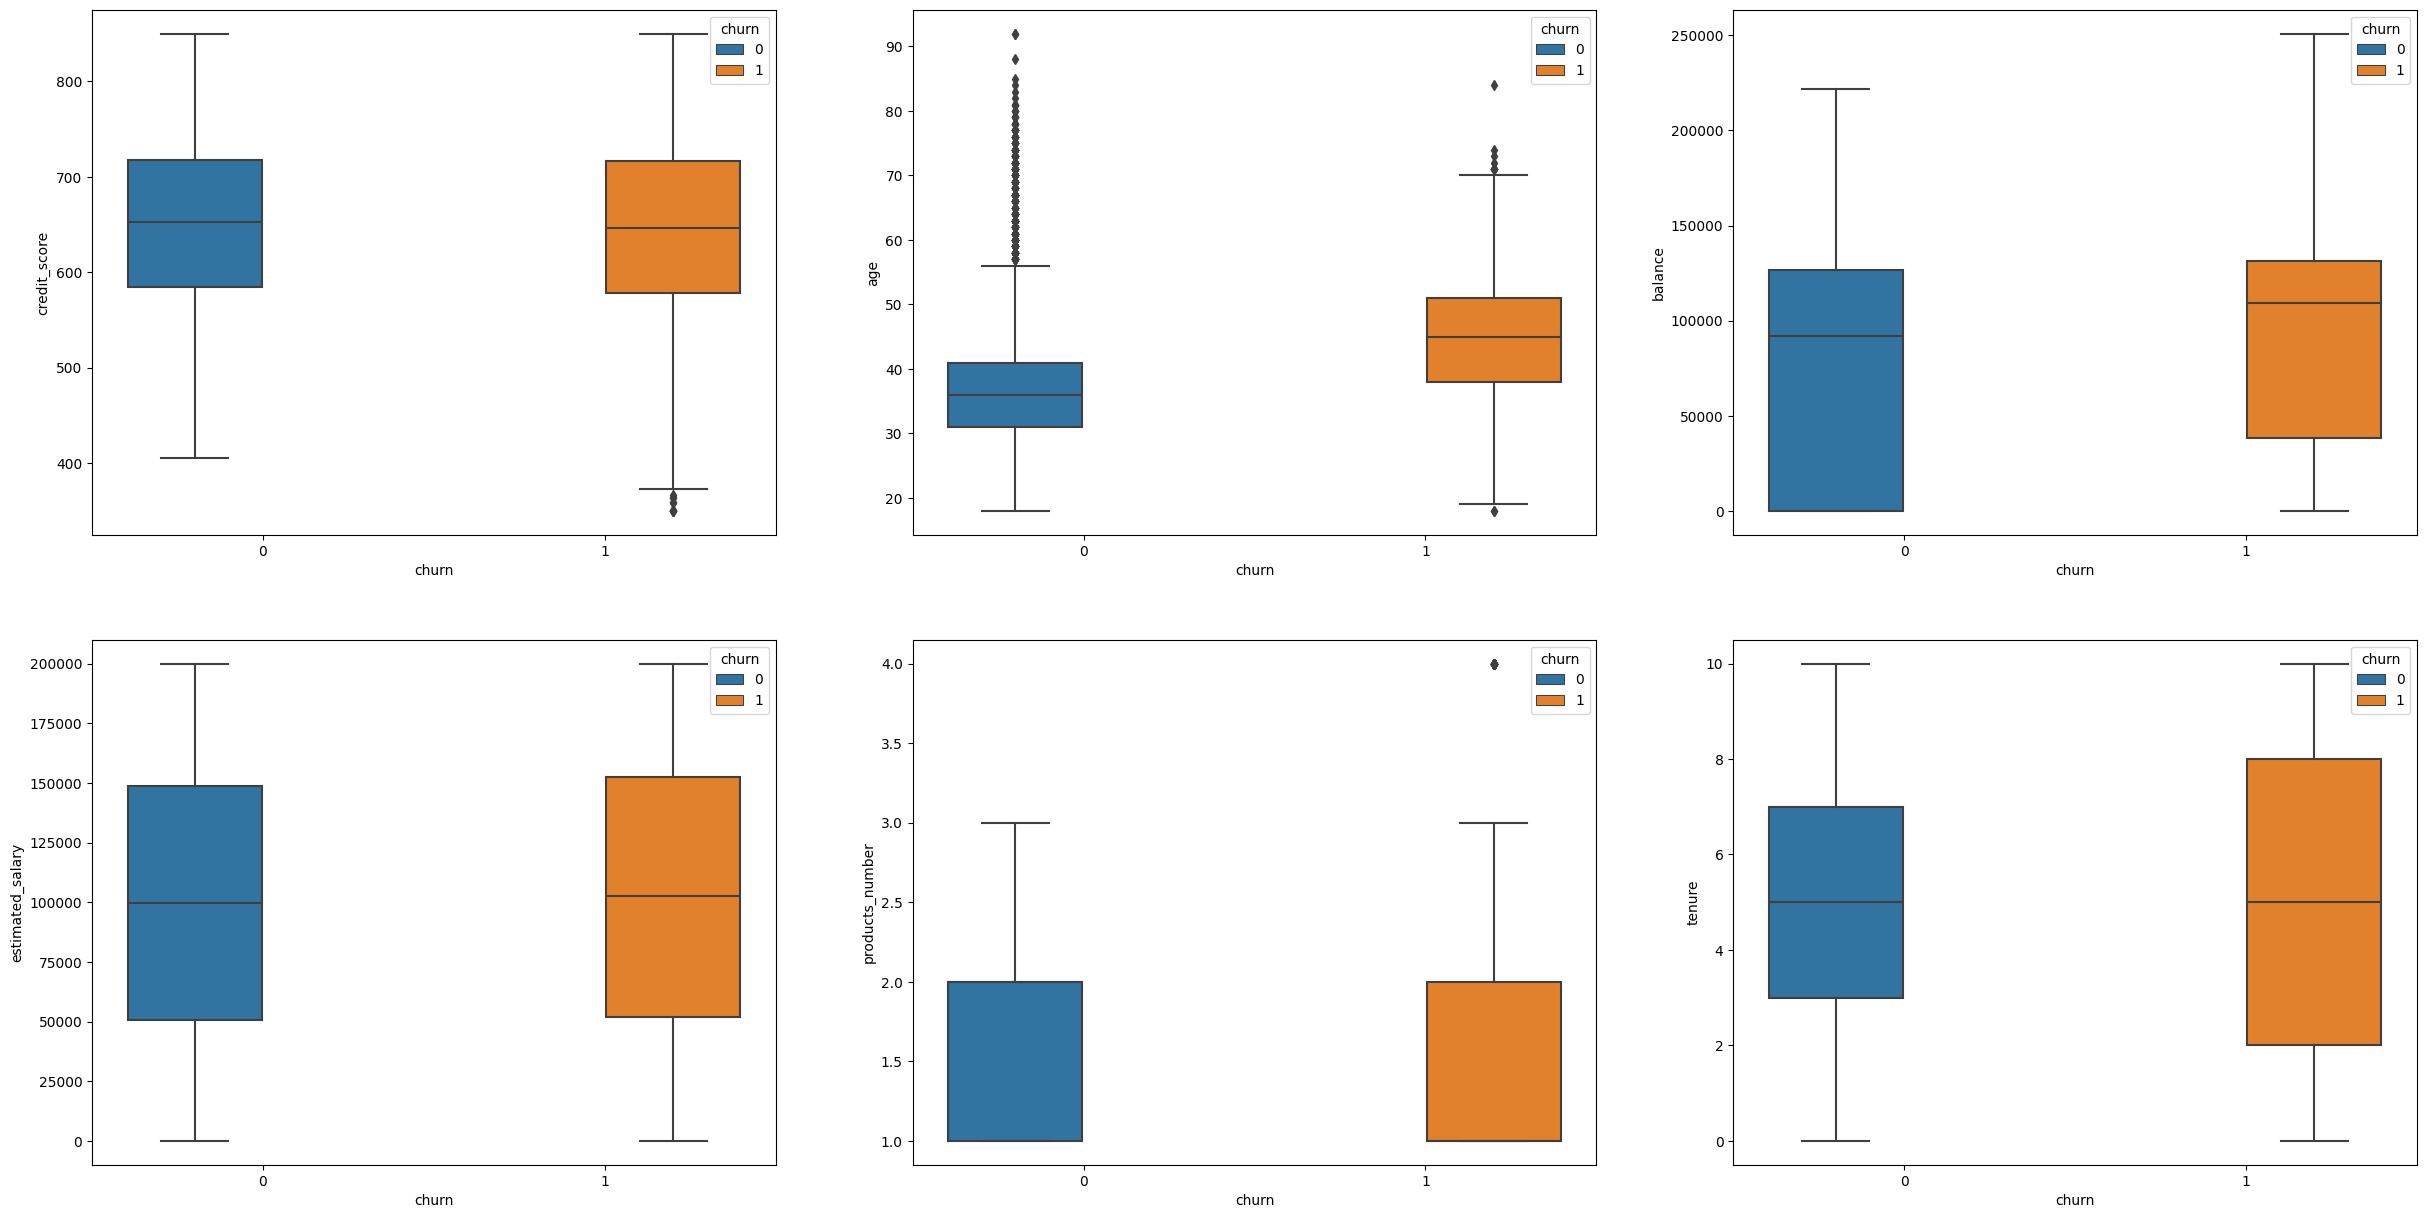

In [353]:
# Count column plots to map the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=data, x='churn', y='credit_score', hue='churn', ax=ax[0][0])
sns.boxplot(data=data, x='churn', y='age', hue='churn', ax=ax[0][1])
sns.boxplot(data=data, x='churn', y='balance', hue='churn', ax=ax[0][2])
sns.boxplot(data=data, x='churn', y='estimated_salary', hue='churn', ax=ax[1][0])
sns.boxplot(data=data, x='churn', y='products_number', hue='churn', ax=ax[1][1])
sns.boxplot(data=data, x='churn', y='tenure', hue='churn', ax=ax[1][2])

plt.show()

## DATA PREPERATION

In [354]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

## Converting Categorical columns to numerical

In [355]:
[i for i in data.columns if data[i].dtype in ['O']]

['country', 'gender']

In [356]:
# for gender, we can give 1 for male and 0 for female
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})
data['gender'].value_counts()

gender
1    5457
0    4543
Name: count, dtype: int64

In [357]:
# For Geography, we can represent France with 1, Spain with 2 and Germany with 3
data['country'] = data['country'].replace({'France': 1, 'Spain':2, 'Germany':3})
data['country'].value_counts()

country
1    5014
3    2509
2    2477
Name: count, dtype: int64

In [358]:
# check datatype
data.dtypes

credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [359]:
data.head()

credit_score  country  gender  age  tenure    balance  products_number  \
0           619        1       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        1       0   42       8  159660.80                3   
3           699        1       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [360]:
# checking skewness from data
churn_true_count = len(data['churn']==1)
churn_false_count = len(data['churn']==0)

In [361]:
(churn_true_count, churn_false_count)

(10000, 10000)

In [362]:
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 10000
total number of columns : 11


In [363]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [364]:
print('Banyak baris nilai nol untuk credit_score :{0}'.format(len(data.loc[data['credit_score']== 0])))
print('Banyak baris nilai nol untuk country :{0}'.format(len(data.loc[data['country']== 0])))
print('Banyak baris nilai nol untuk gender :{0}'.format(len(data.loc[data['gender']== 0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data.loc[data['age']== 0])))
print('Banyak baris nilai nol untuk tenure :{0}'.format(len(data.loc[data['tenure']== 0])))
print('Banyak baris nilai nol untuk balance :{0}'.format(len(data.loc[data['balance']== 0])))
print('Banyak baris nilai nol untuk products_number :{0}'.format(len(data.loc[data['products_number']== 0])))
print('Banyak baris nilai nol untuk credit_card :{0}'.format(len(data.loc[data['credit_card']== 0])))
print('Banyak baris nilai nol untuk active_member :{0}'.format(len(data.loc[data['active_member']== 0])))
print('Banyak baris nilai nol untuk estimated_salary :{0}'.format(len(data.loc[data['estimated_salary']== 0])))

Banyak baris nilai nol untuk credit_score :0
Banyak baris nilai nol untuk country :0
Banyak baris nilai nol untuk gender :4543
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk tenure :413
Banyak baris nilai nol untuk balance :3617
Banyak baris nilai nol untuk products_number :0
Banyak baris nilai nol untuk credit_card :2945
Banyak baris nilai nol untuk active_member :4849
Banyak baris nilai nol untuk estimated_salary :0


In [365]:
# create data2
data2 = data.copy()

In [366]:
# mean
avg_tenure = data2['tenure'].mean()
avg_balance = data2['balance'].mean()

In [367]:
# replace avg to columns
data2['tenure'].replace({0: avg_tenure}, inplace=True)
data2['balance'].replace({0: avg_balance}, inplace=True)

In [368]:
print('Banyak baris nilai nol untuk credit_score :{0}'.format(len(data2.loc[data2['credit_score']== 0])))
print('Banyak baris nilai nol untuk country :{0}'.format(len(data2.loc[data2['country']== 0])))
print('Banyak baris nilai nol untuk gender :{0}'.format(len(data2.loc[data2['gender']== 0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data2.loc[data2['age']== 0])))
print('Banyak baris nilai nol untuk tenure :{0}'.format(len(data2.loc[data2['tenure']== 0])))
print('Banyak baris nilai nol untuk balance :{0}'.format(len(data2.loc[data2['balance']== 0])))
print('Banyak baris nilai nol untuk products_number :{0}'.format(len(data2.loc[data2['products_number']== 0])))
print('Banyak baris nilai nol untuk credit_card :{0}'.format(len(data2.loc[data2['credit_card']== 0])))
print('Banyak baris nilai nol untuk active_member :{0}'.format(len(data2.loc[data2['active_member']== 0])))
print('Banyak baris nilai nol untuk estimated_salary :{0}'.format(len(data2.loc[data2['estimated_salary']== 0])))

Banyak baris nilai nol untuk credit_score :0
Banyak baris nilai nol untuk country :0
Banyak baris nilai nol untuk gender :4543
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk tenure :0
Banyak baris nilai nol untuk balance :0
Banyak baris nilai nol untuk products_number :0
Banyak baris nilai nol untuk credit_card :2945
Banyak baris nilai nol untuk active_member :4849
Banyak baris nilai nol untuk estimated_salary :0


c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

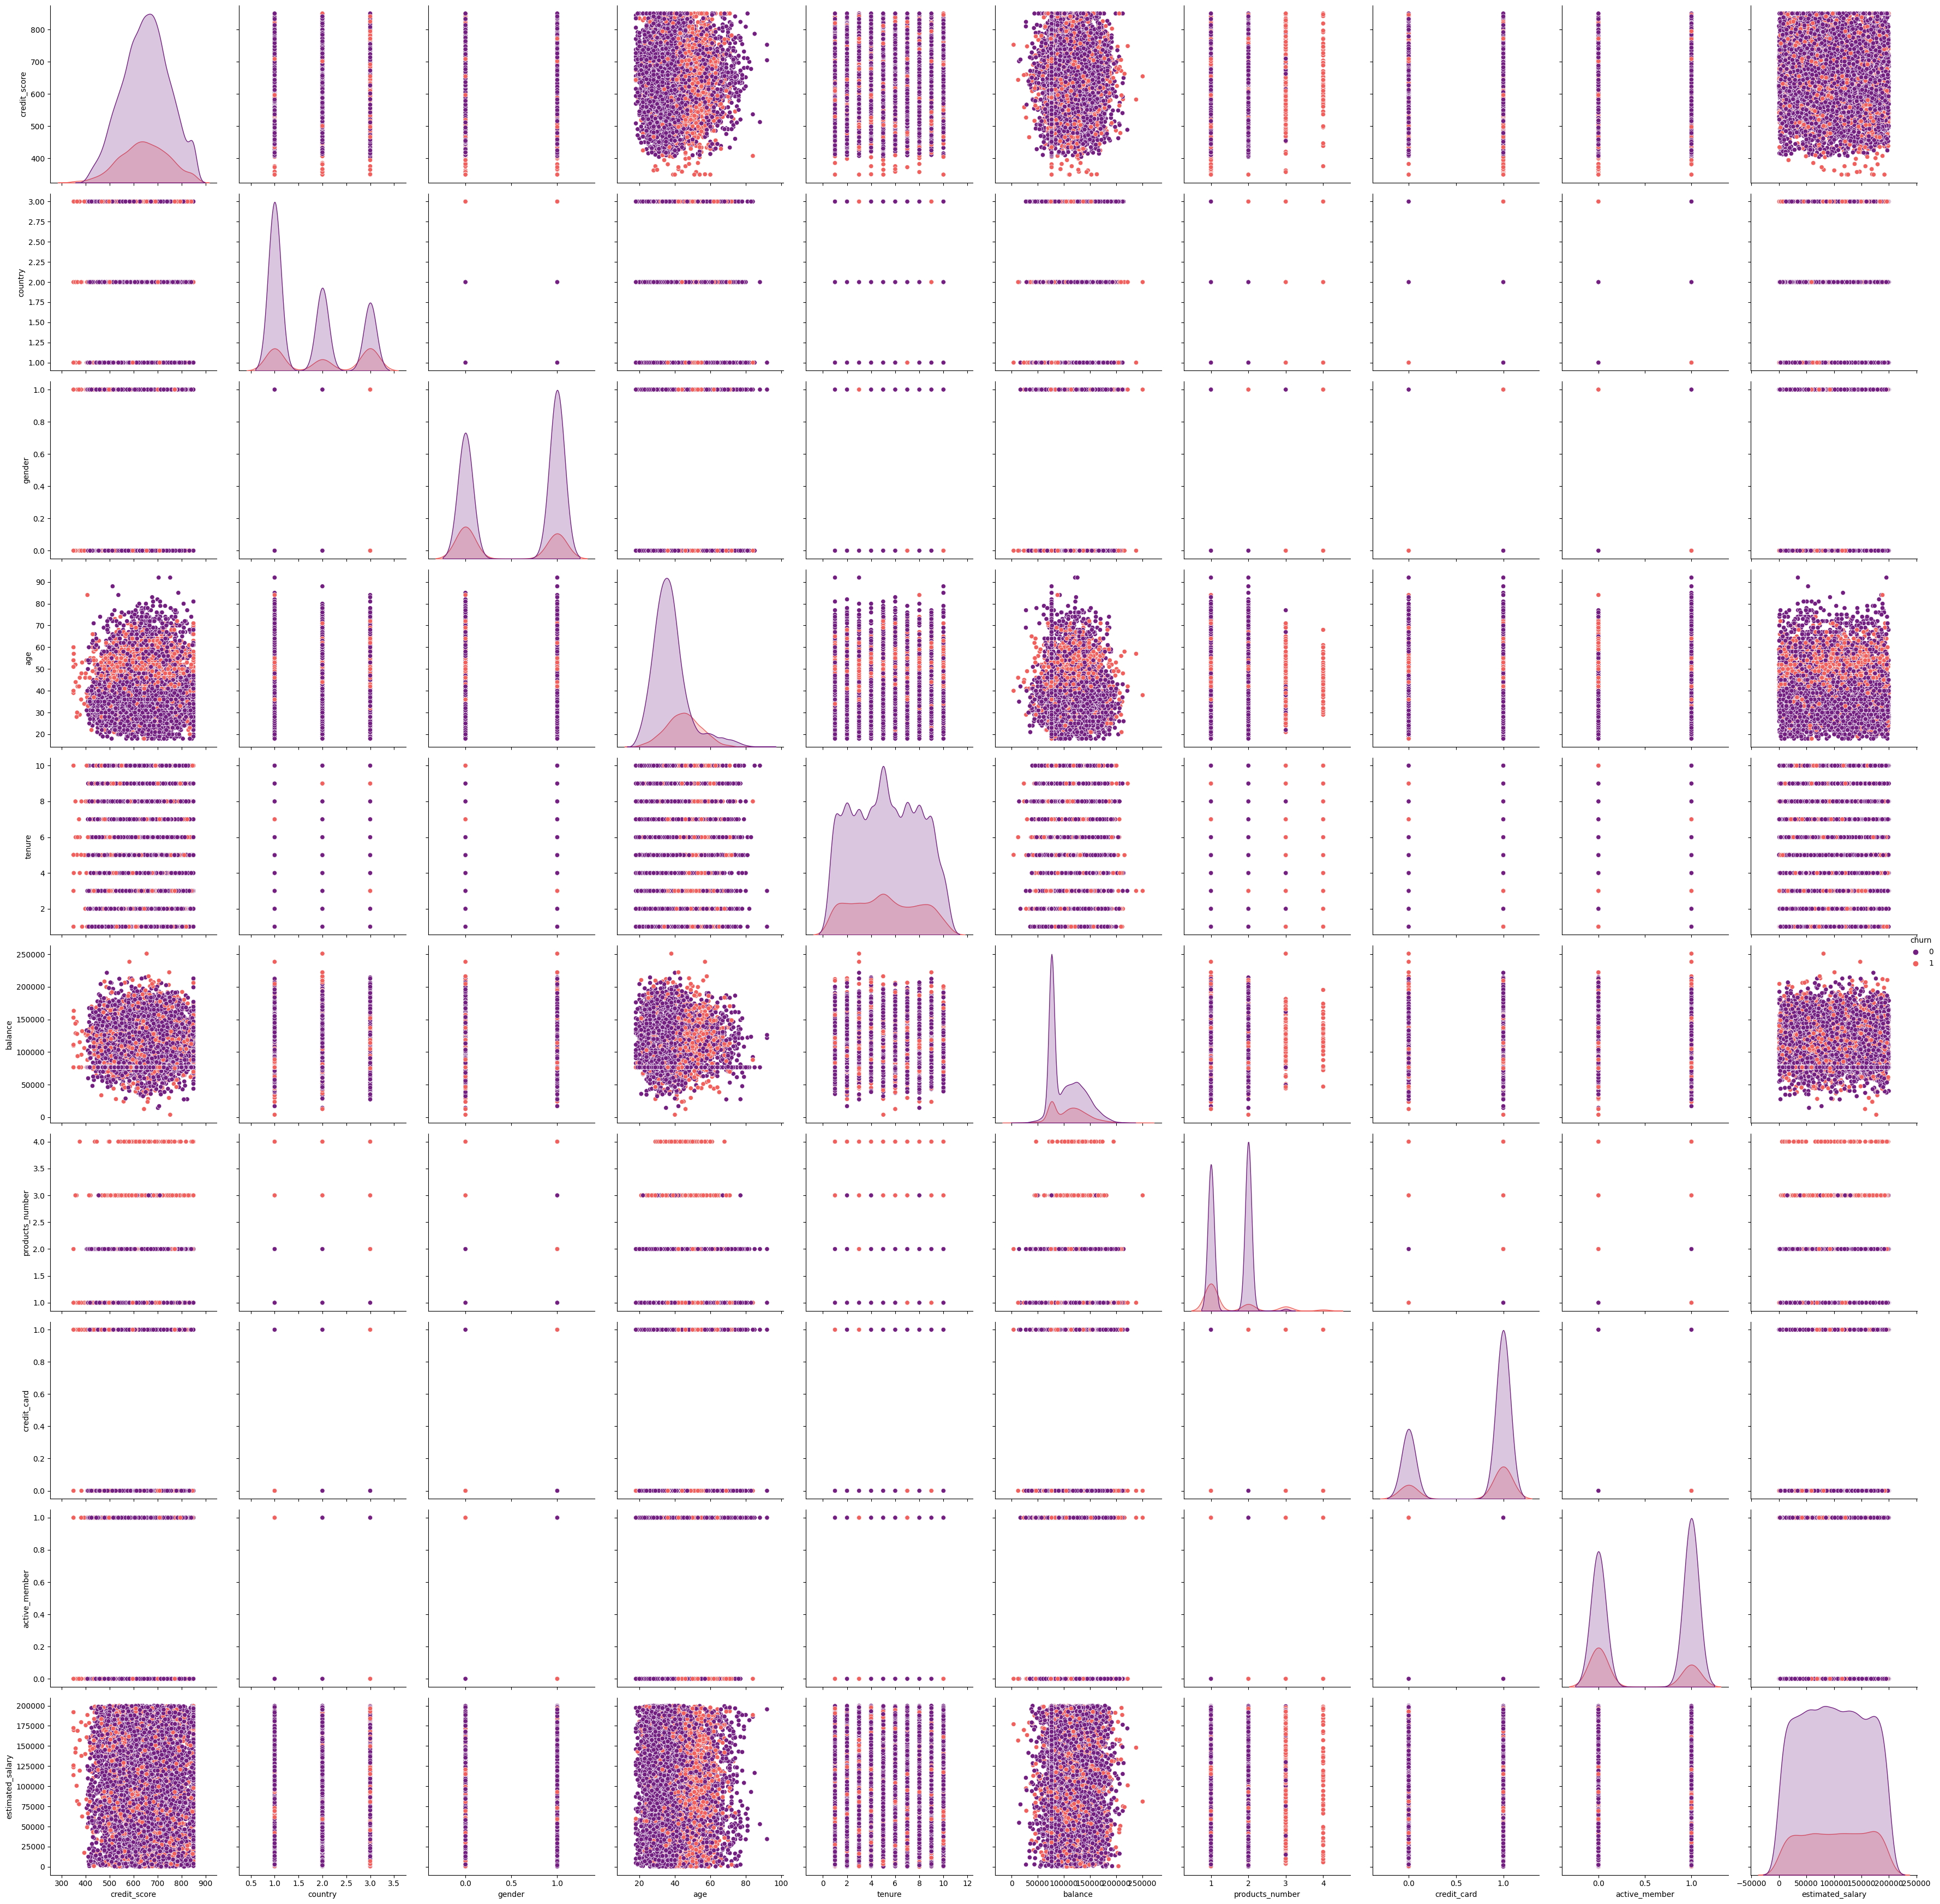

In [369]:
# make pairplot
sns.pairplot(data2, hue='churn', palette='magma', height=3.5)
plt.tight_layout()

c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DGDEV\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

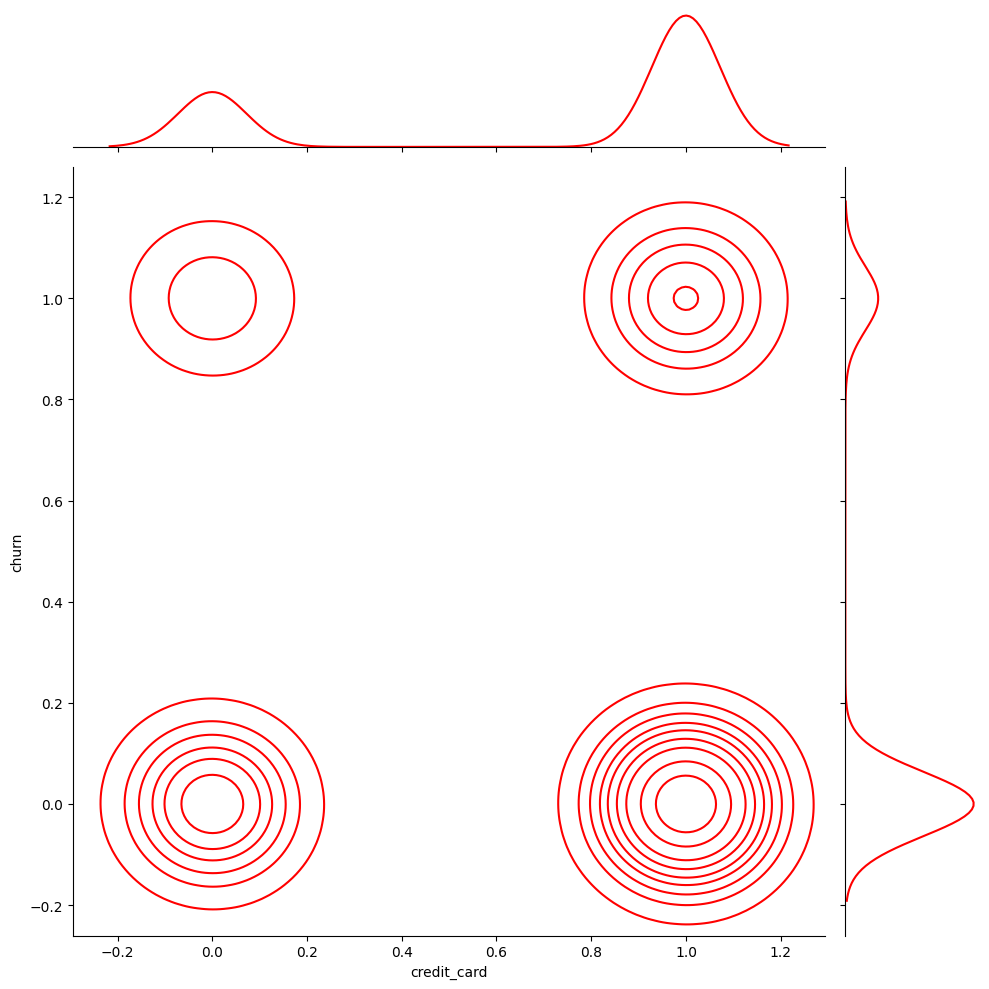

In [370]:
# joinplot
sns.jointplot(x='credit_card', y='churn', data=data2, height=10, kind='kde', color='red')
plt.tight_layout()

## Make Model

In [371]:
from sklearn.model_selection import train_test_split

X = data2.drop('churn', axis=1)
y = data2['churn']

In [372]:
X

credit_score  country  gender  age  tenure        balance  \
0              619        1       0   42     2.0   76485.889288   
1              608        2       0   41     1.0   83807.860000   
2              502        1       0   42     8.0  159660.800000   
3              699        1       0   39     1.0   76485.889288   
4              850        2       0   43     2.0  125510.820000   
...            ...      ...     ...  ...     ...            ...   
9995           771        1       1   39     5.0   76485.889288   
9996           516        1       1   35    10.0   57369.610000   
9997           709        1       0   36     7.0   76485.889288   
9998           772        3       1   42     3.0   75075.310000   
9999           792        1       0   28     4.0  130142.790000   

      products_number  credit_card  active_member  estimated_salary  
0                   1            1              1         101348.88  
1                   1            0              1         112542.58  
2                   3            1              0         113931.57  
3                   2            0              0          93826.63  
4                   1            1              1          79084.10  
...               ...          ...            ...               ...  
9995                2            1              0          96270.64  
9996                1            1              1         101699.77  
9997                1            0              1          42085.58  
9998                2            1              0          92888.52  
9999                1            1              0          38190.78  

[10000 rows x 10 columns]

In [373]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [375]:
X_train

credit_score  country  gender  age  tenure        balance  \
9254           686        1       1   32     6.0   76485.889288   
1561           632        3       1   42     4.0  119624.600000   
1670           559        2       1   24     3.0  114739.920000   
6087           561        1       0   27     9.0  135637.000000   
6669           517        1       1   56     9.0  142147.320000   
...            ...      ...     ...  ...     ...            ...   
5734           768        1       1   54     8.0   69712.740000   
5191           682        1       0   58     1.0   76485.889288   
5390           735        1       0   38     1.0   76485.889288   
860            667        1       1   43     8.0  190227.460000   
7270           697        3       1   51     1.0  147910.300000   

      products_number  credit_card  active_member  estimated_salary  
9254                2            1              1         179093.26  
1561                2            1              1         195978.86  
1670                1            1              0          85891.02  
6087                1            1              0         153080.40  
6669                1            0              0          39488.04  
...               ...          ...            ...               ...  
5734                1            1              1          69381.05  
5191                1            1              1            706.50  
5390                3            0              0          92220.12  
860                 1            1              0          97508.04  
7270                1            1              1          53581.14  

[8000 rows x 10 columns]

In [376]:
X_train.shape

(8000, 10)

In [377]:
y_train.shape

(8000,)

In [378]:
X_test

credit_score  country  gender  age  tenure        balance  \
6252           596        3       1   32     3.0   96709.070000   
4684           623        1       1   43     1.0   76485.889288   
1731           601        2       0   44     4.0   76485.889288   
4742           506        3       1   59     8.0  119152.100000   
4521           560        2       0   27     7.0  124995.980000   
...            ...      ...     ...  ...     ...            ...   
6412           602        3       0   53     5.0   98268.840000   
8285           609        1       1   25    10.0   76485.889288   
7853           730        1       0   47     7.0   76485.889288   
1095           692        1       1   29     4.0   76485.889288   
6929           628        3       1   39     1.0  115341.190000   

      products_number  credit_card  active_member  estimated_salary  
6252                2            0              0          41788.37  
4684                2            1              1         146379.30  
1731                2            1              0          58561.31  
4742                2            1              1         170679.74  
4521                1            1              1         114669.79  
...               ...          ...            ...               ...  
6412                1            0              1          45038.29  
8285                1            0              1         109895.16  
7853                1            1              0          33373.26  
1095                1            1              0          76755.99  
6929                1            1              1         107674.30  

[2000 rows x 10 columns]

In [379]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: churn, Length: 8000, dtype: int64

## Naive Bayes Clasification 

In [401]:
# make xgboost model
import xgboost

xgboost_model = xgboost.XGBClassifier() 

In [402]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [403]:
xgboost_prediction = xgboost_model.predict(X_test)